In [126]:
# SOM

In [127]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [129]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [130]:
# Encoding categorical data
df = encoding_char(df)

In [131]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [132]:
X = df[:, [0, 2, 7]]

In [133]:
#! pip install SimpSOM

In [152]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


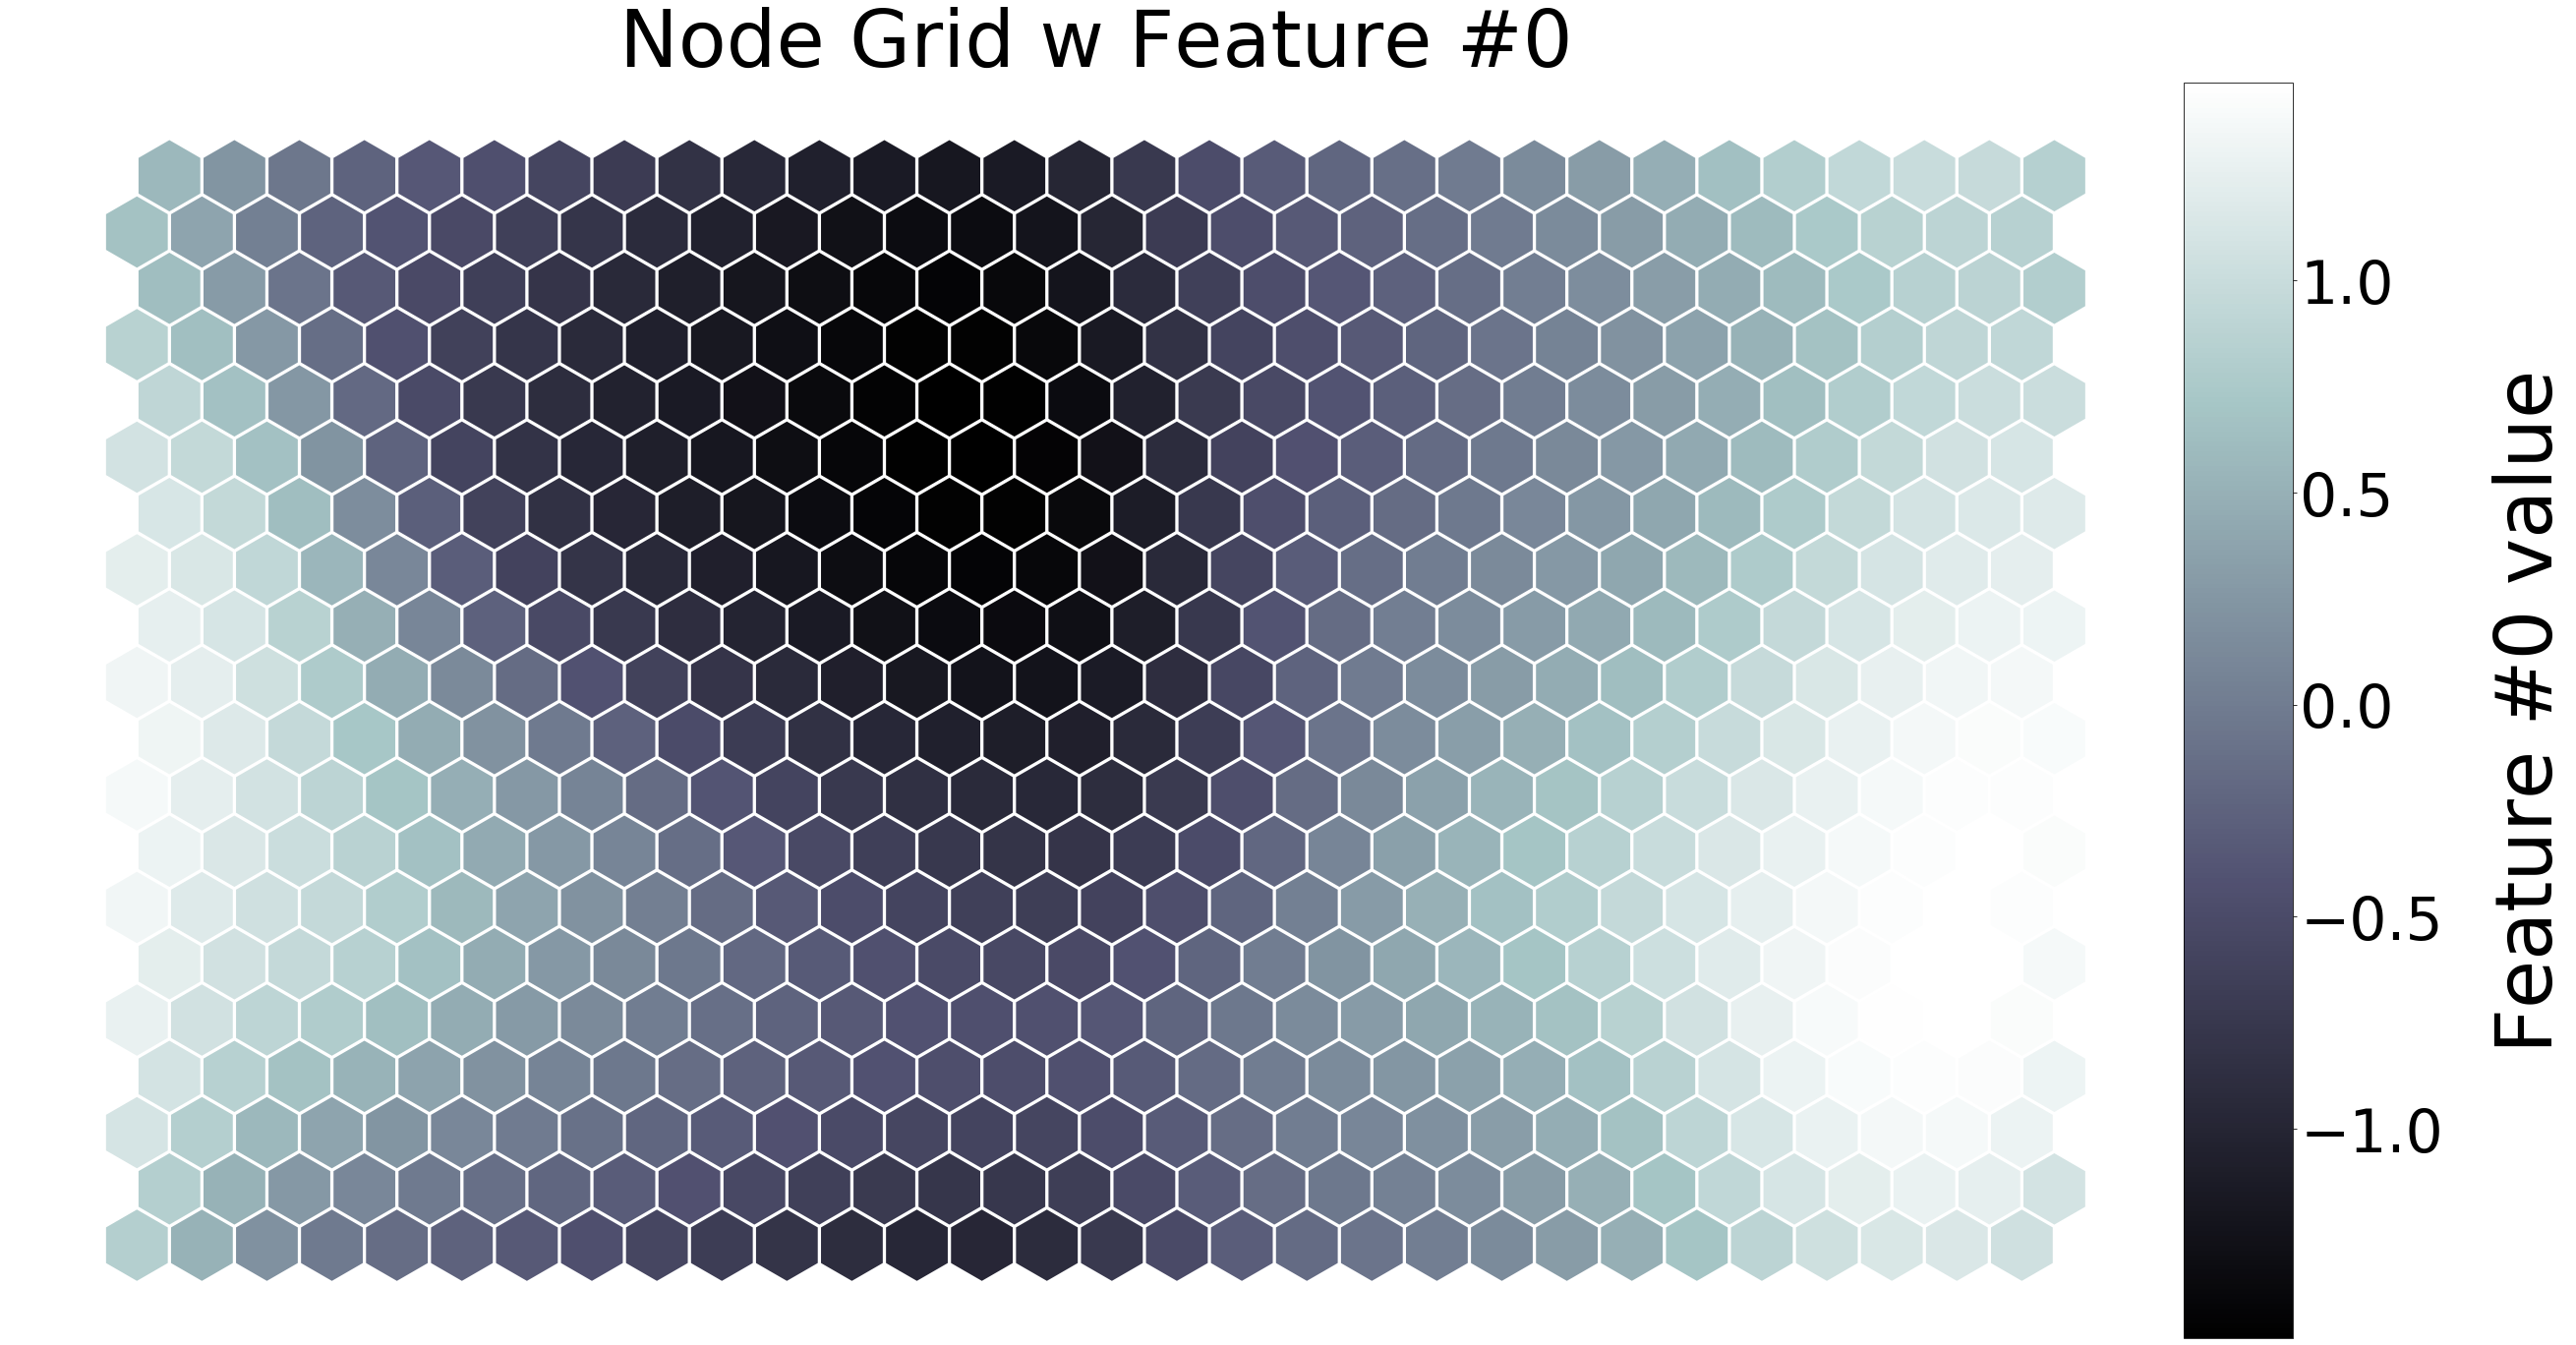

In [153]:
net.nodes_graph(colnum=0)

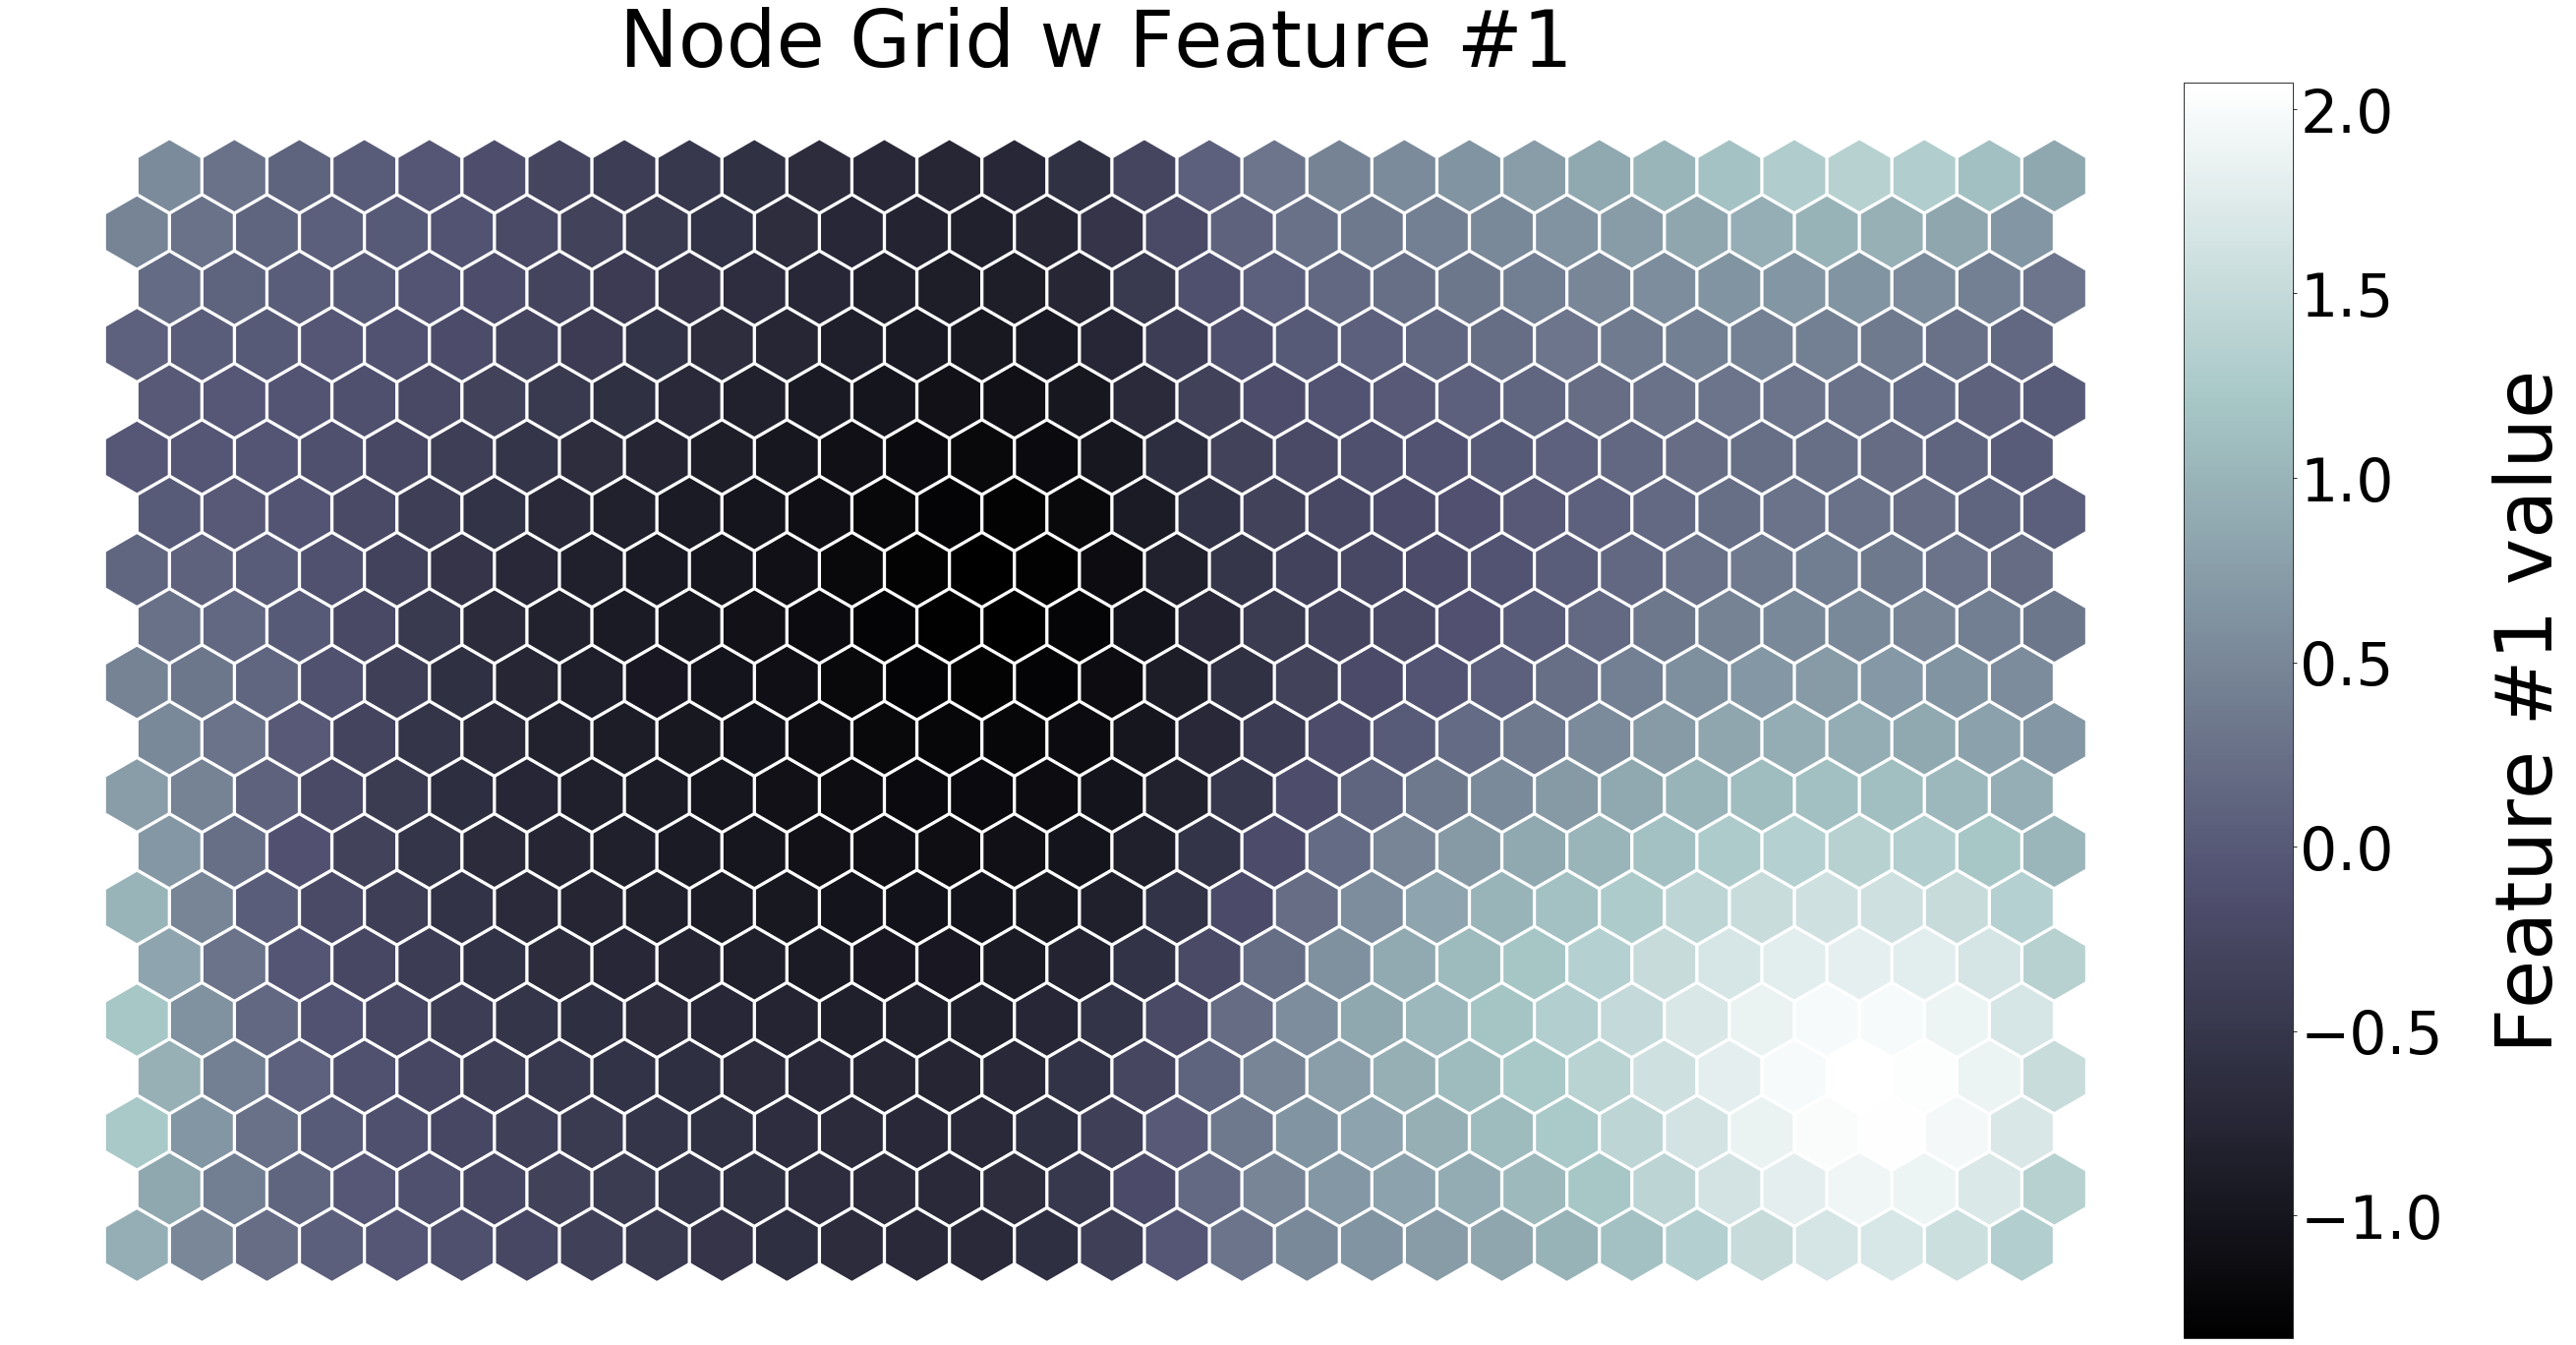

In [154]:
net.nodes_graph(colnum=1)

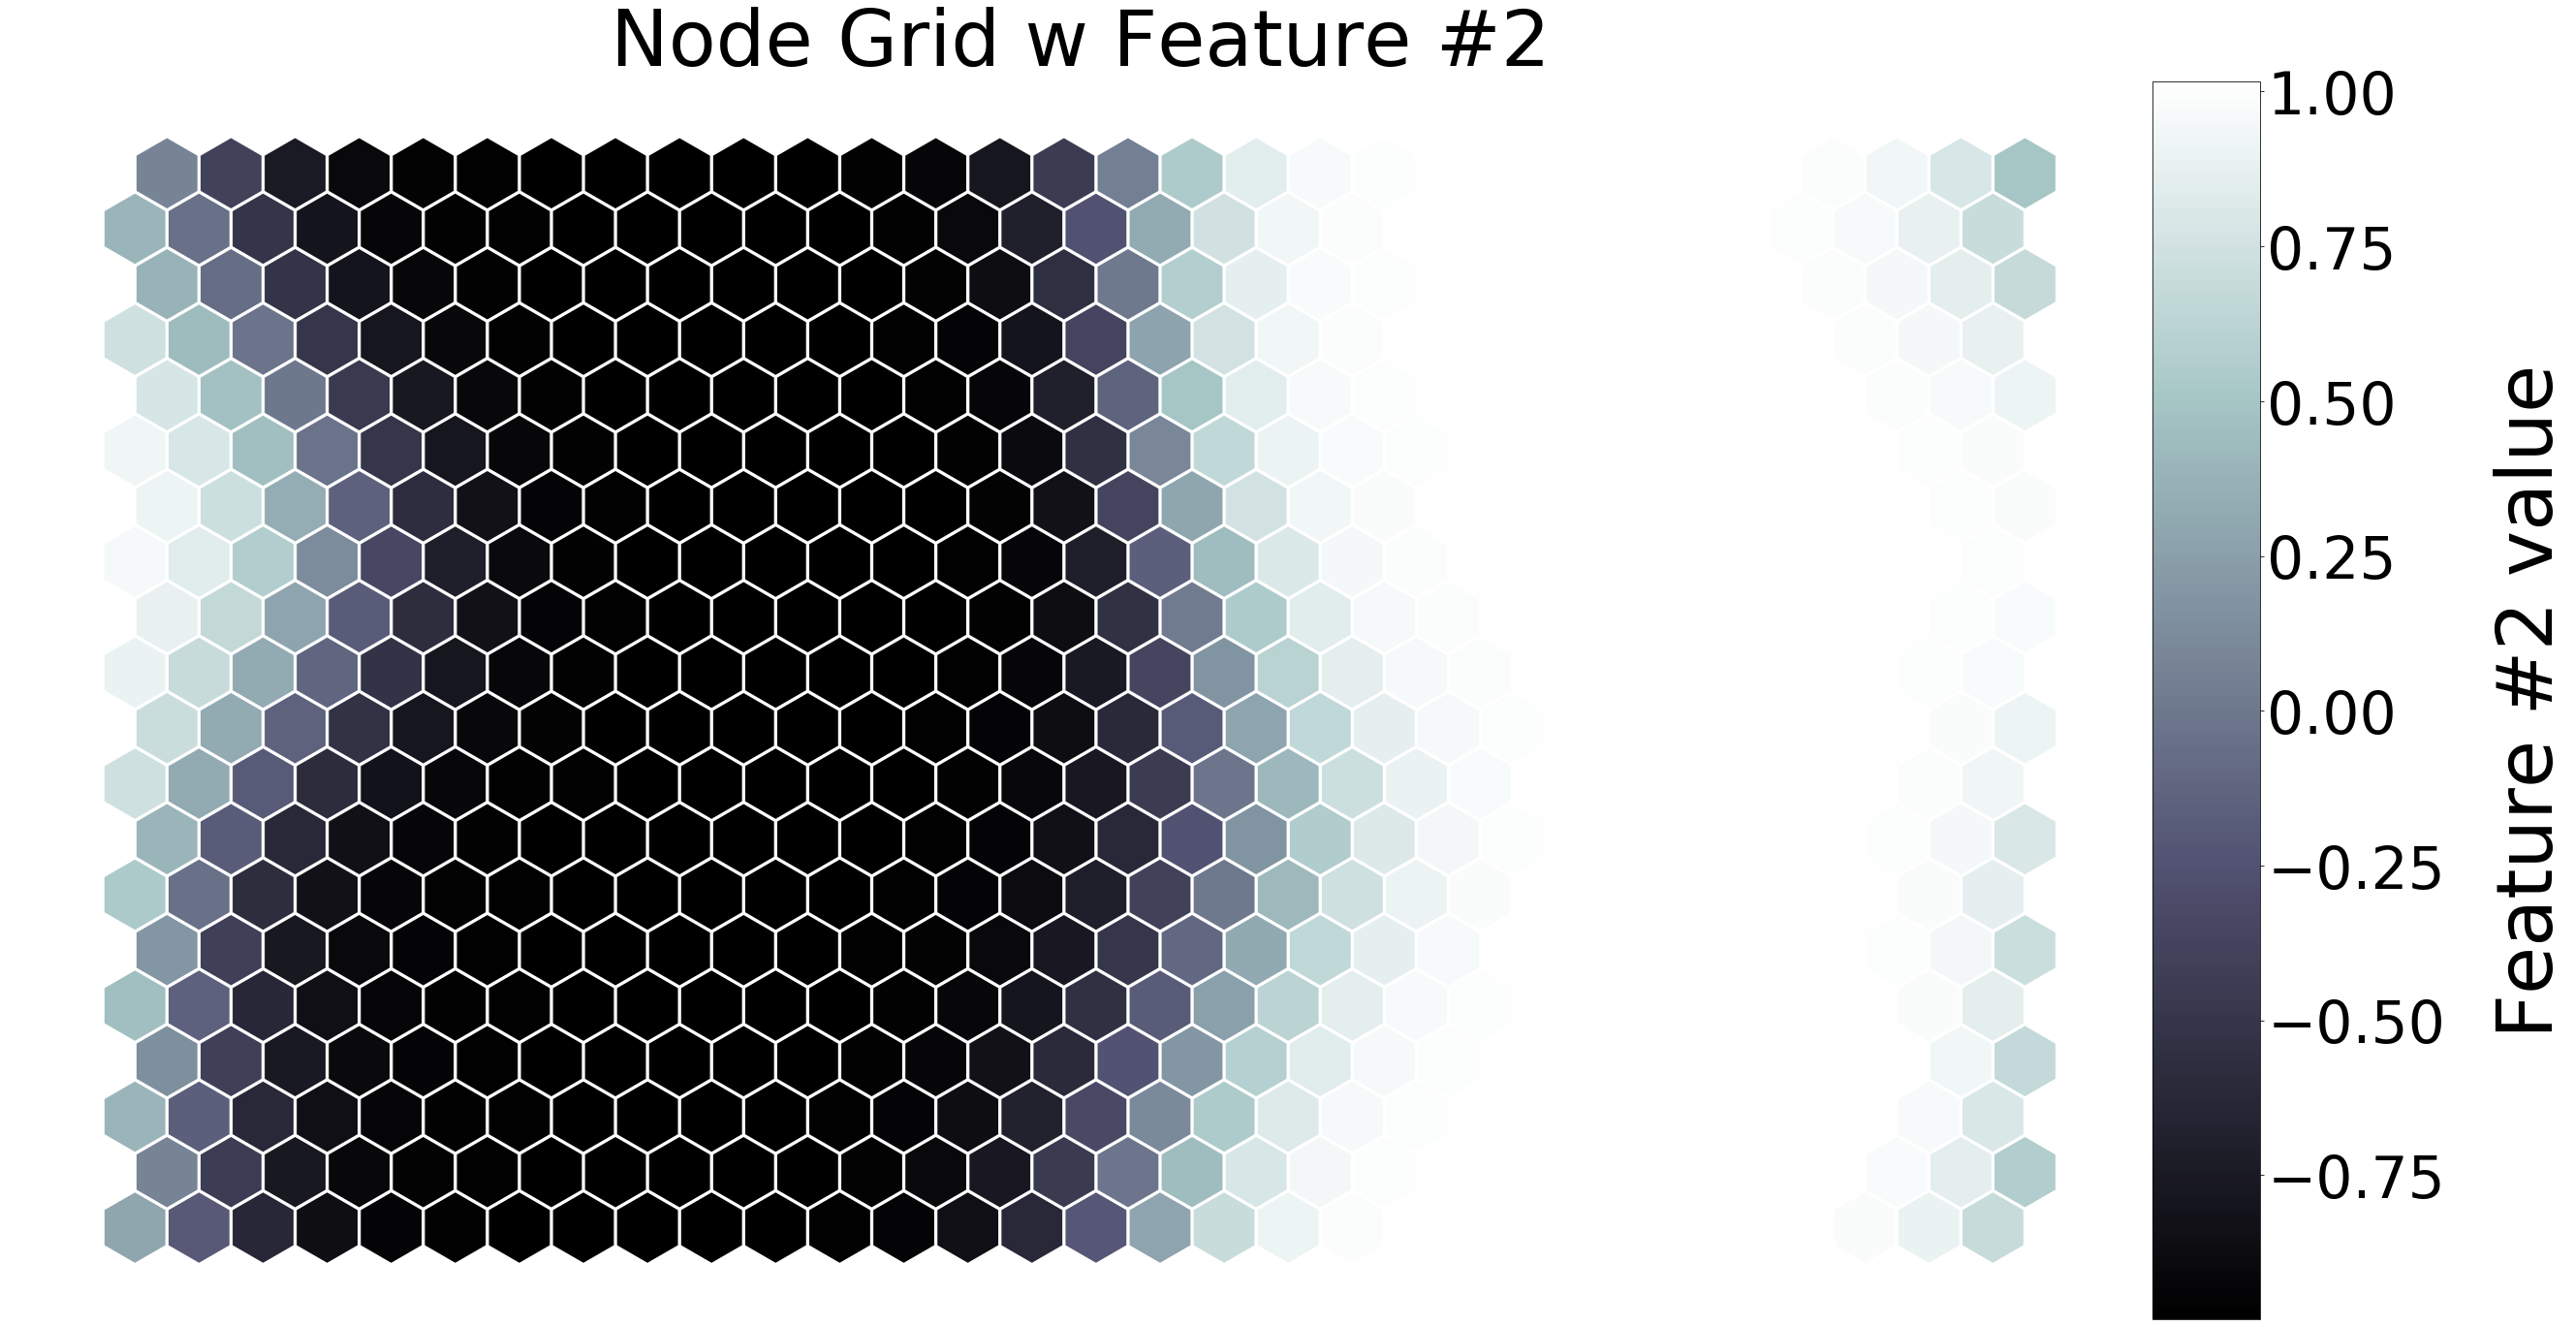

In [155]:
net.nodes_graph(colnum=2)

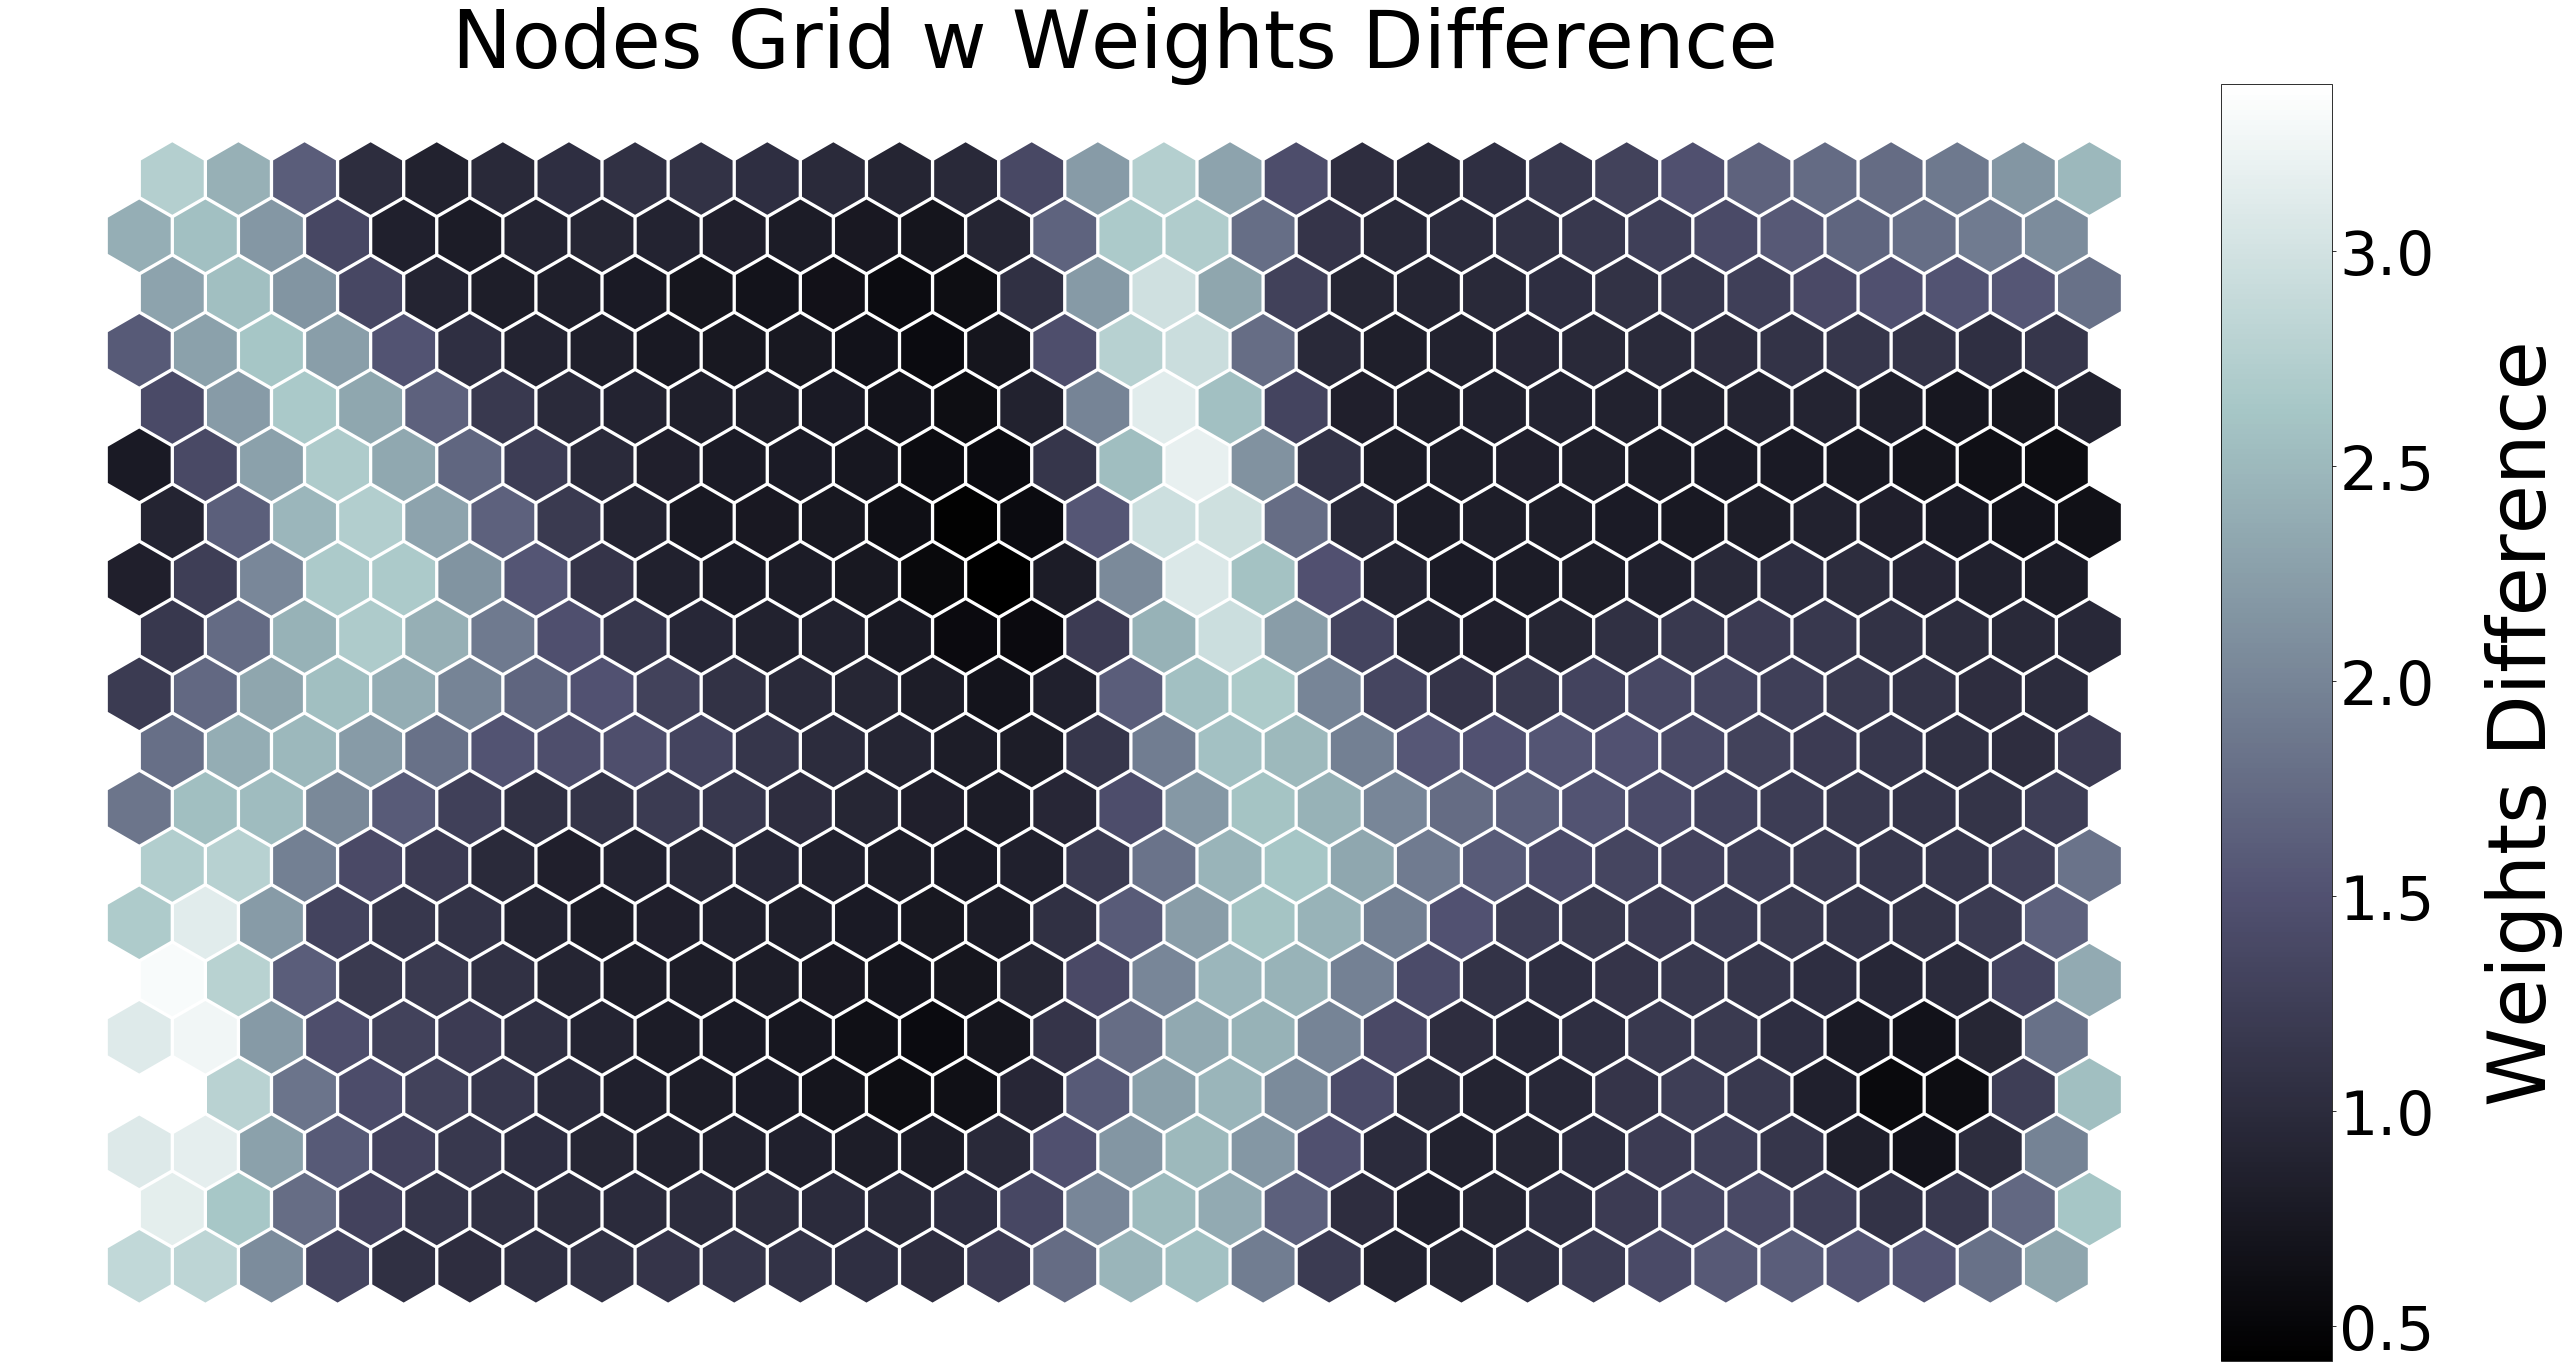

In [156]:
net.diff_graph()

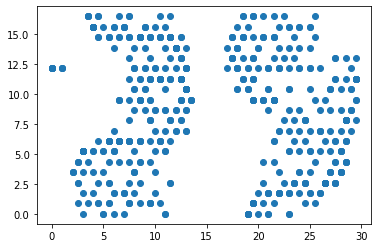

In [157]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [158]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [159]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [160]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,kmeans.labels_)

0.6447474036757329

In [161]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [162]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.9408013777234088